In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from methods import node_wise_interpolation

%matplotlib inline

In [2]:
donor_shape = (10, 10)
target_shape = (20, 20)

x_low, x_high = -1, 1
y_low, y_high = -1, 1

donor_x = np.linspace(x_low, x_high, donor_shape[0])
donor_y = np.linspace(y_low, y_high, donor_shape[1])

donor_mesh = []
for x in donor_x:
    for y in donor_y:
        donor_mesh.append([x, y])
donor_mesh = np.array(donor_mesh).reshape((donor_shape[0], donor_shape[1], 2))

X, Y = np.meshgrid(donor_x, donor_y)
donor_values = np.sqrt(X**2 + Y**2)

target_x = np.linspace(x_low, x_high, target_shape[0])
target_y = np.linspace(y_low, y_high, target_shape[1])

target_mesh = []
for x in target_x:
    for y in target_y:
        target_mesh.append([x, y])
target_mesh = np.array(target_mesh).reshape((target_shape[0], target_shape[1], 2))


target_values = node_wise_interpolation(donor_mesh, donor_values, target_mesh)

target_shape =  (4, 4)


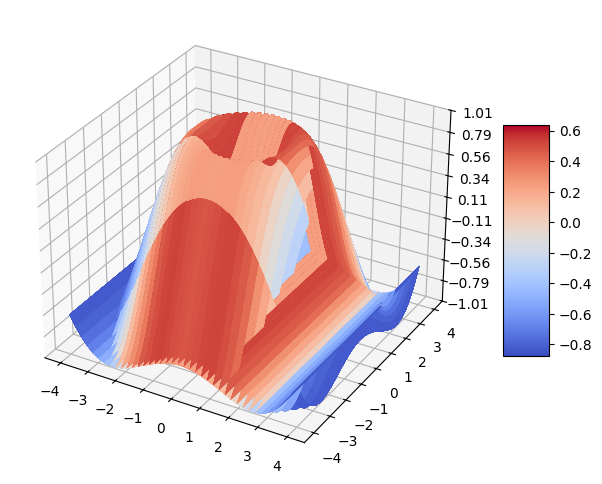

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection="3d")

# X, Y = np.meshgrid(donor_x, donor_y)
X, Y = np.meshgrid(target_x, target_y)

# surf = ax.plot_surface(X, Y, donor_values, cmap=cm.coolwarm,)
surf = ax.plot_surface(
    X,
    Y,
    target_values,
    cmap=cm.coolwarm,
)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()